# Iris datasets

In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [338]:
iris = pd.read_csv(r"C:\Users\Lenovo\Downloads\DS_Assignment - internship (1)\Screening Test - DS\iris.csv")
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


# DATA PREPROCESSING
- size of the datasets
- distribution of the datasets
- identifying missing values or outliers

In [339]:
iris.shape

(150, 5)

In [340]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Inference
- There are 150 obeservations for each of the four features, meaning there is no missing values in the datasets.
- The standard deviation of sepal length is 0.83 cm, standard deviation of sepal width is 0.43 cm. This indicates that there is relatively low variation in sepal width.
- The standard deviation of petal length is 1.76 cm and standard deviation of petal width is 0.76 cm this indicates that there isrelatively high variation in petal length.

In [341]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

- The dataset balanced and evenly distributed across the three categories

In [342]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Feature Engineering

- Identifying feature and target variable
- spliting the data into training and testing datasets.
- feature scaling
- feature selection

> ## Feature scaling

In [344]:
#label encoding
for col in iris.columns:
    le=LabelEncoder()
    le.fit(iris[col])
    iris[col]=le.transform(iris[col])
    print

In [373]:
X =iris
y= iris['petal_width']

In [374]:
iris.species.unique()

array([0, 1, 2])

In [375]:
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,8,14,4,1,0
1,6,9,4,1,0
2,4,11,3,1,0


> ## Feature Selection

In [376]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [377]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [378]:
ch2=SelectKBest(chi2,k=4)
X_new=ch2.fit_transform(X,y)

In [379]:
# Create a new DataFrame to store the results
results = pd.DataFrame(ch2.scores_, columns=['chi2_score'])

In [380]:
# Add the column names to the results
results['column_name'] = X.columns
results.sort_values(by='chi2_score', ascending=False, inplace=True)

In [381]:
results

,chi2_score,column_name
2,1023.460985,petal_length
3,680.338279,petal_width
0,466.912065,sepal_length
1,167.152660,sepal_width
4,95.291667,species


- Based on the univariate feature selection performed using the chi-square test, we can conclude that the petal length and petal width features have the highest predictive power in determining the species of the Iris flowers, followed by sepal length and sepal width features, respectively
- This is evident from their respective chi-squared scores, with petal length having the highest score of 1023.46, followed by petal width with a score of 680.34, and sepal length and sepal width having scores of 466.91 and 167.15, respectively. 

> ## PCA

In [384]:
X=iris.drop(columns='species',axis=1)
y=iris['species']

In [391]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
iris_pca =pca.fit_transform(X)

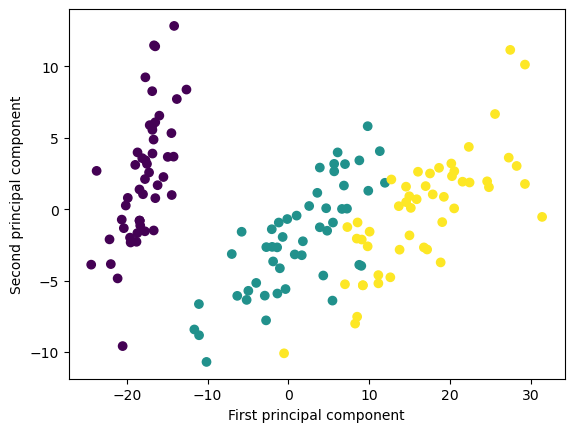

In [388]:
import matplotlib.pyplot as plt

# plot transformed data
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=y)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

# Model selection

## Linear Regression

In [393]:
X_train,X_test,y_train,y_test=train_test_split(iris_pca,y,test_size=0.2,random_state=0)

In [394]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [398]:
from sklearn.metrics import accuracy_score

In [413]:
lr.score(X_test, y_test)

0.8921111575325849

# Decision Tree Regressor

In [410]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [409]:
model =DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [411]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.06666666666666667


In [412]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9333333333333333

# Support Vector Regression

In [416]:
from sklearn.svm import SVR

In [418]:
svr = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [421]:
y_pred = svr.predict(X_test)

In [422]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.05989840154102883


# Neural network

In [477]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [484]:
df=pd.read_csv(r"C:\Users\Lenovo\Downloads\DS_Assignment - internship (1)\Screening Test - DS\iris.csv")

In [485]:
# Split the data into features and target variable
X = df.drop('species', axis=1)
y = df['species']

In [486]:
# Convert categorical labels to integer labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [487]:
y = to_categorical(y)
y_train = to_categorical(y_train, num_classes=3)


In [488]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [489]:
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [492]:
y_train = np.argmax(y_train, axis=1)

In [497]:
model.compile(optimizer='adamax', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [498]:
model.fit(X_train, y_train, epochs=50, batch_size=5)

Epoch 1/50
24/24 [==============================] - 1s 3ms/step - loss: 0.4276 - accuracy: 0.7667
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 0.4241 - accuracy: 0.7667
Epoch 3/50
24/24 [==============================] - 0s 3ms/step - loss: 0.4219 - accuracy: 0.7667
Epoch 4/50
24/24 [==============================] - 0s 3ms/step - loss: 0.4208 - accuracy: 0.7750
Epoch 5/50
24/24 [==============================] - 0s 3ms/step - loss: 0.4187 - accuracy: 0.7667
Epoch 6/50
24/24 [==============================] - 0s 3ms/step - loss: 0.4192 - accuracy: 0.7833
Epoch 7/50
24/24 [==============================] - 0s 3ms/step - loss: 0.4145 - accuracy: 0.7750
Epoch 8/50
24/24 [==============================] - 0s 3ms/step - loss: 0.4143 - accuracy: 0.7417
Epoch 9/50
24/24 [==============================] - 0s 3ms/step - loss: 0.4116 - accuracy: 0.7667
Epoch 10/50
24/24 [==============================] - 0s 3ms/step - loss: 0.4102 - accuracy: 0.7750
Epoch 11/50
24/24 [

In [500]:
print("Accuracy:", accuracy)

Accuracy: 0.9333333333333333
